In [ ]:
import pandas as pd 
dados_viagem = "/home/joao/Estudos_py_ml/analise_de_dados/projeto_pandas_governo/2023_Viagem.csv"

df_viagens = pd.read_csv(dados_viagem, encoding="Windows-1252", sep=";", decimal=",")
pd.set_option('display.max_columns', None)



In [ ]:
df_viagens["Nome do órgão superior"]


In [ ]:
df_viagens["Valor diárias"]

In [ ]:
##para mostrar dois elementos , como valor da diaria e nome do orgao voce cria uma lista com esses dois elementos 

colunas = ["Nome do órgão superior","Valor diárias"]
df_viagens[colunas]


In [ ]:
##Usando metodo upper para botar as letras para maiusculo e usando o replace para abreviar para MIN

df_viagens["Nome do órgão superior"].str.upper().str.replace("MINISTÉRIO", "MIN.")


In [ ]:
df_viagens[["Valor diárias", "Valor passagens"]]

In [ ]:
##mudando o tipo de str para float

df_viagens['Valor diárias'] = df_viagens['Valor diárias']


In [ ]:
df_viagens["Valor diárias"]

In [ ]:
df_viagens['Valor outros gastos'] = df_viagens['Valor outros gastos']
df_viagens['Valor passagens'] = df_viagens['Valor passagens']
df_viagens["Valor devolução"] = df_viagens['Valor devolução']

In [ ]:
df_viagens.info()

In [ ]:
df_viagens['Valor diárias'] + df_viagens['Valor passagens']




In [ ]:
df_viagens["Despesas"] = df_viagens["Valor diárias"] + df_viagens["Valor passagens"] + df_viagens["Valor outros gastos"]

In [ ]:
df_viagens

In [ ]:
pd.set_option('display.float_format','{:.2f}'.format)
(df_viagens["Cargo"].value_counts(normalize=True)*100).rename("Proporção de Viagens").reset_index()

In [ ]:
##depesas por agrumento de Cargo 
pd.set_option('display.float_format','{:.2f}'.format)
df_viagens.groupby("Cargo")["Despesas"].sum().reset_index().sort_values(by="Despesas",ascending=False)

In [ ]:
viagens_por_cargo = (df_viagens["Cargo"].value_counts(normalize=True)*100).rename("Proporção de Viagens").reset_index()

In [ ]:
filtro_mais_de_1_pct = viagens_por_cargo["Proporção de Viagens"] > 1 

In [ ]:
viagens_por_cargo

In [ ]:
viagens_por_cargo[filtro_mais_de_1_pct]

In [ ]:
gasto_totais_por_cargo = df_viagens.groupby("Cargo")["Despesas"].sum().reset_index()

In [ ]:
gasto_totais_por_cargo[gasto_totais_por_cargo['Despesas']> 10_000_000]

In [ ]:
df_viagens['Cargo'] = df_viagens['Cargo'].fillna("NÃO IDENTIFICADO")
df_viagens

In [ ]:
pd.to_datetime(df_viagens["Período - Data de início"], dayfirst=True)
pd.to_datetime(df_viagens["Período - Data de fim"], dayfirst=True)


In [ ]:
df_viagens["Período - Data de início"]  = pd.to_datetime(df_viagens["Período - Data de início"], dayfirst=True)
df_viagens["Período - Data de fim"]  = pd.to_datetime(df_viagens["Período - Data de fim"], dayfirst=True)

In [ ]:
df_viagens["Mes da viagem"] = df_viagens["Período - Data de início"].dt.month_name()

In [ ]:
(df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days

In [ ]:
df_viagens["dias de viagem"] =  (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days

In [ ]:
df_viagens

In [ ]:
(df_viagens.
 groupby("Cargo")
 .agg(
     despesa_media=("Despesas","mean"),
     duracao_media=("dias de viagem","mean"),
     despesas_totais=("Despesas","sum"),
     destinos_mais_frequentes=("Destinos", pd.Series.mode),
     n_viagens=("Nome","count")
     )
 .reset_index()
 )

In [ ]:
df_cargos = df_viagens["Cargo"].value_counts(normalize=True).reset_index()
df_cargos

In [ ]:
df_cargos.loc[df_cargos["proportion"] > 0.01,'Cargo'] 

In [ ]:
df_viagens_consolidado = (
(df_viagens.
 groupby("Cargo")
 .agg(
     despesa_media=("Despesas","mean"),
     duracao_media=("dias de viagem","mean"),
     despesas_totais=("Despesas","sum"),
     destinos_mais_frequentes=("Destinos", pd.Series.mode),
     n_viagens=("Nome","count")
     )
 .reset_index()
 )
)

In [ ]:
cargos_relevantes = df_cargos.loc[df_cargos["proportion"] > 0.01]


In [ ]:
filtro= df_viagens_consolidado["Cargo"].isin(cargos_relevantes)

In [53]:
# Criando tabela consolidada
df_viagens_consolidado = (df_viagens
    .groupby('Cargo')
    .agg(
        despesa_media=('Despesas', 'mean'),
        duracao_media=('dias de viagem', 'mean'),
        despesas_totais=('Despesas', 'sum'),
        destino_mais_frequente=('Destinos', pd.Series.mode),
        n_viagens=('Nome', 'count')
    )
    .reset_index()
    .sort_values(by='despesas_totais', ascending=False)
)

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
df_cargos.columns = ['Cargo', 'proportion']
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

# Chegando na tabela final - consolidada e filtrada!
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)
df_final

,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
494,NÃO IDENTIFICADO,3260.26,8.01,1049266194.86,Brasília/DF,321835
443,Informações protegidas por sigilo,3137.48,7.41,370919369.30,Informações protegidas por sigilo,118222
569,PROFESSOR DO MAGISTERIO SUPERIOR,2032.08,3.87,110890764.22,Brasília/DF,54570
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,1402.20,2.34,52548741.25,Brasília/DF,37476
315,CONTRATADO LEI 8745/93 - NI,984.45,2.84,17510463.07,Bauru/SP,17787
208,AUDITOR FISCAL FEDERAL AGROPECUARIO,1465.85,2.06,24306782.30,Brasília/DF,16582
72,ANALISTA AMBIENTAL,2596.94,5.13,35344371.79,Brasília/DF,13610
179,ASSISTENTE EM ADMINISTRAçãO,1291.03,2.17,15094703.63,Brasília/DF,11692
776,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1457.08,3.19,15816641.46,Brasília/DF,10855
686,TECNICO DO SEGURO SOCIAL,4302.48,11.37,45881679.92,Brasília/DF,10664


In [54]:
df_final = df_final.sort_values(by="n_viagens")

<Axes: xlabel='Cargo'>

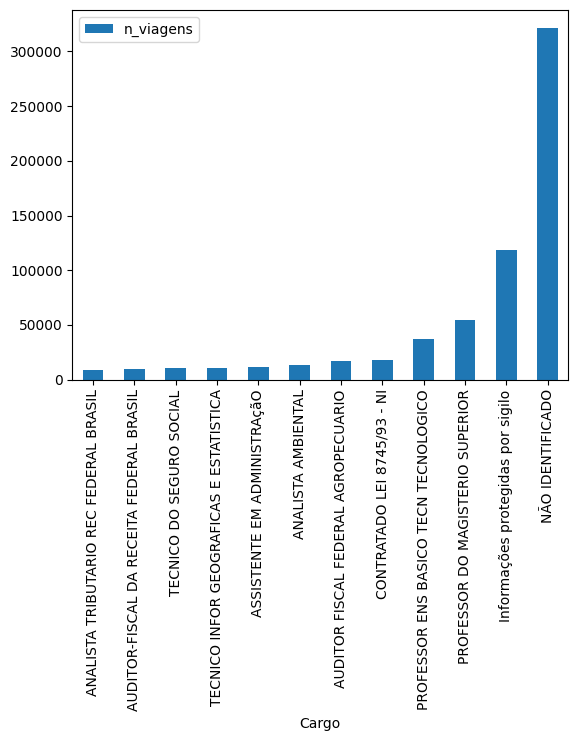

In [56]:
df_final.plot(x="Cargo", y="n_viagens" , kind="bar")